### Exotic options 
- Pricing exotic options with Monte Carlo simulation

In [5]:
import numpy as np 
nsim = 10              # Number of simulations
nstep = 5              # h 

e = np.random.normal(loc=0.0, scale=1.0, size=(nsim,nstep))  # 10 x 5 
print(e)


[[-0.23092302  0.5168684  -1.25300056 -1.0296965   0.52985031]
 [ 2.1590161   1.84813331  0.47959397  1.04026272  0.5239105 ]
 [-0.08006935  1.28938793 -1.1412429  -2.15144928 -1.11711791]
 [ 1.02278604  1.47548657  1.59930464 -1.95491652 -0.24393537]
 [-0.51120549  0.43998625  0.07196378 -2.1161996   1.25468798]
 [ 0.00594246  2.11986142  1.63214177 -1.26053785 -0.09499487]
 [ 1.07705949  0.18485347  0.76766554  0.13468859 -1.33580641]
 [ 0.87771651  1.66423185  0.7092983   0.43991224 -0.40628246]
 [-2.05527956  0.97513235  2.57113357 -1.5410734   0.19919229]
 [-1.08915985 -0.035454    0.47099354  1.16674875 -1.85013018]]


### Exchange options : Variations
- Max of two assets 

In [1]:
import numpy as np

def simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho):
    dt = T / nstep
    Z1 = np.random.normal(0, 1, (nsim, nstep))
    Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, (nsim, nstep))
    S1 = S0[0] * np.exp((r - 0.5 * sigma[0]**2) * T + sigma[0] * np.sqrt(T) * Z1[:, -1])
    S2 = S0[1] * np.exp((r - 0.5 * sigma[1]**2) * T + sigma[1] * np.sqrt(T) * Z2[:, -1])
    return S1, S2

def exchange_option_maximum(S1, S2, T, r):
    payoff = np.maximum(S1, S2)
    return np.exp(-r * T) * np.mean(payoff)

# Parameters
S0 = [100, 90]
sigma = [0.2, 0.25]
r = 0.05
T = 1
nstep = 252
nsim = 10000
rho = 0.5

# Simulate prices and calculate option price
S1, S2 = simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho)
price = exchange_option_maximum(S1, S2, T, r)
print(f"Maximum of two assets: {price:.2f}")


Maximum of two assets: 104.42


# Min of two 

In [2]:
import numpy as np

def simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho):
    dt = T / nstep
    Z1 = np.random.normal(0, 1, (nsim, nstep))
    Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, (nsim, nstep))
    S1 = S0[0] * np.exp((r - 0.5 * sigma[0]**2) * T + sigma[0] * np.sqrt(T) * Z1[:, -1])
    S2 = S0[1] * np.exp((r - 0.5 * sigma[1]**2) * T + sigma[1] * np.sqrt(T) * Z2[:, -1])
    return S1, S2

def exchange_option_minimum(S1, S2, T, r):
    payoff = np.minimum(S1, S2)
    return np.exp(-r * T) * np.mean(payoff)

# Parameters
S0 = [100, 90]     # S1, S2 
sigma = [0.2, 0.25]
r = 0.05
T = 1
nstep = 252
nsim = 10000
rho = 0.5

# Simulate prices and calculate option price
S1, S2 = simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho)
price = exchange_option_minimum(S1, S2, T, r)
print(f"Minimum of two assets: {price:.2f}")


Minimum of two assets: 85.41


- max of two assets and cash 

In [3]:
import numpy as np

def simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho):
    dt = T / nstep
    Z1 = np.random.normal(0, 1, (nsim, nstep))
    Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, (nsim, nstep))
    S1 = S0[0] * np.exp((r - 0.5 * sigma[0]**2) * T + sigma[0] * np.sqrt(T) * Z1[:, -1])
    S2 = S0[1] * np.exp((r - 0.5 * sigma[1]**2) * T + sigma[1] * np.sqrt(T) * Z2[:, -1])
    return S1, S2

def exchange_option_max_with_cash(S1, S2, T, r, K):
    payoff = np.maximum(np.maximum(S1, S2), K)
    return np.exp(-r * T) * np.mean(payoff)

# Parameters
S0 = [100, 90]
sigma = [0.2, 0.25]
r = 0.05
T = 1
nstep = 252
nsim = 10000
rho = 0.5
K = 100

# Simulate prices and calculate option price
S1, S2 = simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho)
price = exchange_option_max_with_cash(S1, S2, T, r, K)
print(f"Maximum of two assets and cash: {price:.2f}")


Maximum of two assets and cash: 108.45


- max of max 

In [3]:
import numpy as np
np.random.seed(5)

def simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho):
    dt = T / nstep
    Z1 = np.random.normal(0, 1, (nsim, nstep))
    Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, (nsim, nstep))
    S1 = S0[0] * np.exp((r - 0.5 * sigma[0]**2) * T + sigma[0] * np.sqrt(T) * Z1[:, -1])
    S2 = S0[1] * np.exp((r - 0.5 * sigma[1]**2) * T + sigma[1] * np.sqrt(T) * Z2[:, -1])
    return S1, S2

def exchange_option_max_max_minus_cash(S1, S2, T, r, K):
    payoff = np.maximum(np.maximum(S1, S2) - K, 0)
    return np.exp(-r * T) * np.mean(payoff)

# Parameters
S0 = [50, 40]
sigma = [0.3, 0.25]
r = 0.05
T = 1
nstep = 1
nsim = 10000
rho = -0.5
K = 45

# Simulate prices and calculate option price
S1, S2 = simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho)
price = exchange_option_max_max_minus_cash(S1, S2, T, r, K)
print(f"Maximum of maximum : {price:.4f}")


Maximum of maximum : 12.1592


- max of three 

In [7]:
import numpy as np

def simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho_matrix):
    dt = T / nstep
    L = np.linalg.cholesky(rho_matrix)
    Z = np.random.normal(0, 1, (nsim, len(S0)))
    correlated_Z = Z @ L.T
    S = []
    for i in range(len(S0)):
        S.append(S0[i] * np.exp((r - 0.5 * sigma[i]**2) * T + sigma[i] * np.sqrt(T) * correlated_Z[:, i]))
    return np.array(S).T

def exchange_option_maximum_of_three(S, T, r):
    payoff = np.max(S, axis=1)
    return np.exp(-r * T) * np.mean(payoff)

# Parameters
S0 = [100, 90, 110]
sigma = [0.2, 0.25, 0.3]
r = 0.05
T = 1
nstep = 252
nsim = 10000
rho_matrix = np.array([[1.0, 0.5, 0.3],
                       [0.5, 1.0, 0.2],
                       [0.3, 0.2, 1.0]])

# Simulate prices and calculate option price
S = simulate_asset_prices(S0, sigma, r, T, nstep, nsim, rho_matrix)
price = exchange_option_maximum_of_three(S, T, r)
print(f"Maximum of three assets: {price:.2f}")


Maximum of three assets: 119.99


# Barrier Options 
- up and out 
- up and in 
- down and out 
- down and in 

In [18]:
# setting 

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(5)

nsim = 500

nstep = 260 # trading days in a year
T = 1
dt = T/nstep
r = 0.05
sigma = 0.25
S_0 = 100

e = np.random.normal(loc=0.0, scale=1.0, size=(nsim,nstep))

S_t = S_0*np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * e).cumprod(axis=1)

- up and in call

In [19]:
H = 110
K = 120

barrier_hit = np.any(S_t > H, axis=1)    # return True, False Matrix 

# terminal price & hit barrier 
payoff = np.maximum(S_t[:, -1] - K, 0) * barrier_hit        

# Calculate the option price
call_price = np.mean(np.exp(-r * T) * payoff)

print("Knock-in Up and In Call Option Price:", round(call_price, 4))



Knock-in Up and In Call Option Price: 5.9656


- up and out put 

In [25]:
H = 110
K = 120

barrier_out = np.any(S_t > H, axis=1)    

# terminal price & hit barrier 
payoff = np.maximum( K - S_t[:, -1], 0) * ~barrier_out       

# Calculate the option price
call_price = np.mean(np.exp(-r * T) * payoff)

print("Up and Out Put Option Price:", round(call_price, 4))



Up and Out Put Option Price: 10.3641


- down and out call

In [32]:
H = 110
K = 120

barrier = np.any(S_t < H, axis=1)    

# terminal price & hit barrier 
payoff = np.maximum( K -S_t[:, -1]  , 0) * ~barrier    

# Calculate the option price
call_price = np.mean(np.exp(-r * T) * payoff)

print("Down and out Call Option Price:", round(call_price, 4))



Down and out Call Option Price: 0.0


# Asian Options : path dependent

- Step1 : simulating multiple stock price paths using the Geometric Brownian Motion (GBM) mode

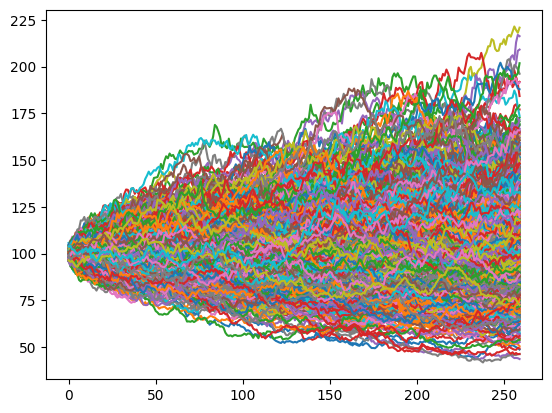

In [34]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(5)
nsim = 1000              # Number of simulations
nstep = 260              # Trading days in a year
T = 1                    # Time horizon
dt = T/nstep            # One Time step
r = 0.05                # Risk-free rate
sigma = 0.25            # Volatility
S_0 = 100               # Initial stock price

# Generate random paths
e = np.random.normal(loc=0.0, scale=1.0, size=(nsim,nstep))
S_t = S_0*np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * e).cumprod(axis=1)  # GBM process
plt.plot(S_t.T)
plt.show()


- Step 2: compute terminal payoffs and prices for European options

In [35]:
K = 100
S_T = S_t[:,nstep-1]   

# European Call
C_T = np.fmax(S_T - K,0)   # terminal payoff
C_0 = np.exp(-r*T) * np.mean(C_T)  # discount * expQ(terminal_payoff )
print('European call terminal price (Monte Carlo), with num of paths ')
print(f'terminal prices: {C_T} , size: {C_T.size}')

print('European call price (Monte Carlo)')
print(round(C_0,2))

# European Put
P_T = np.fmax(K - S_T,0)  # terminal payoff 
P_0 = np.exp(-r*T) * np.mean(P_T)
print('European put terminal price (Monte Carlo), with num of paths ')
print(f'terminal prices: {P_T} , size: {P_T.size}')

print('European put price (Monte Carlo)')
print(round(P_0,2))

European call terminal price (Monte Carlo), with num of paths 
terminal prices: [8.08593330e+00 1.08495274e+01 0.00000000e+00 7.70921177e+01
 4.31169946e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.82678830e+01 0.00000000e+00 1.31904892e+01
 1.94386343e+01 6.52112891e+00 1.09112338e+02 9.24038340e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.68523058e+01 1.04349121e+01 1.52289115e+01 1.11755738e+01
 1.64891397e+01 0.00000000e+00 2.59605048e+01 0.00000000e+00
 9.23531320e+00 5.19581587e+00 2.45914125e+01 7.67500851e+00
 0.00000000e+00 9.11332538e+00 0.00000000e+00 5.06524993e+01
 0.00000000e+00 2.95001235e+00 3.60624481e+01 3.40701151e+01
 0.00000000e+00 0.00000000e+00 6.94448505e+01 0.00000000e+00
 0.00000000e+00 3.31609685e+01 5.29721204e+01 2.95732058e+01
 1.75818973e+01 2.87957274e-01 0.00000000e+00 0.00000000e+00
 2.73032185e+01 4.43715104e+01 6.68463461e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.78267064e+01 3.34914786e+01
 1.24



### Asian Average-Price Options

**Asian Average-Price Call:**
$AC_0 = e^{-rT}E[\max(\bar{S} - K, 0)]$
where $\bar{S} = \frac{1}{n}\sum_{i=1}^{n}S_i$

**Asian Average-Price Put:**
$AP_0 = e^{-rT}E[\max(K - \bar{S}, 0)]$
where $\bar{S} = \frac{1}{n}\sum_{i=1}^{n}S_i$

### Asian Average-Strike Options

**Asian Average-Strike Call:**
$ASC_0 = e^{-rT}E[\max(S_T - \bar{S}, 0)]$
where $\bar{S} = \frac{1}{n}\sum_{i=1}^{n}S_i$

**Asian Average-Strike Put:**
$ASP_0 = e^{-rT}E[\max(\bar{S} - S_T, 0)]$
where $\bar{S} = \frac{1}{n}\sum_{i=1}^{n}S_i$

Where:
- $\bar{S}$ is the arithmetic average of stock prices over the period



In [36]:
## Price : 
# Asian average-price call : S_bar - K 
S_avg = S_t.mean(axis=1)
AC_T = np.fmax(S_avg - K,0)
AC_0 = np.exp(-r*T) * np.mean(AC_T)
print('Asian average-price call price (Monte Carlo)')
print(round(AC_0,2))

# Asian average-price put : K - S_bar 
AP_T = np.fmax(K - S_avg,0)
AP_0 = np.exp(-r*T) * np.mean(AP_T)
print('Asian average-price put price (Monte Carlo)')
print(round(AP_0,2))

## Strike : 
# Asian average-strike call : S_T  - S_bar 
ASC_T = np.fmax(S_T - S_avg,0)
ASC_0 = np.exp(-r*T) * np.mean(ASC_T)
print('Asian average-strike call price (Monte Carlo)')
print(round(ASC_0,2))

# Asian average-strike put : S_bar - S_T 
ASP_T = np.fmax(S_avg - S_T,0)
ASP_0 = np.exp(-r*T) * np.mean(ASP_T)
print('Asian average-strike put price (Monte Carlo)')
print(round(ASP_0,2))

Asian average-price call price (Monte Carlo)
6.92
Asian average-price put price (Monte Carlo)
4.29
Asian average-strike call price (Monte Carlo)
7.27
Asian average-strike put price (Monte Carlo)
4.58


### Lookback options 

##### Floating Strike Lookback call


In [40]:
S_max = S_t.max(axis=1)
S_min = S_t.min(axis=1)

FSLC_T = np.fmax(S_T - S_min,0)
FSLC_0 = np.exp(-r*T) * np.mean(FSLC_T)
print('Floating-strike lookback call price (Monte Carlo)')
print(round(FSLC_0,2))


Floating-strike lookback call price (Monte Carlo)
20.14


##### Floating Strike Lookback put

In [41]:
S_max = S_t.max(axis=1)  # Maximum price along each path
FSLP_T = np.fmax(S_max - S_T, 0)  # Payoff: max(Maximum price - Final price, 0)
FSLP_0 = np.exp(-r*T) * np.mean(FSLP_T)
print('Floating-strike lookback put price (Monte Carlo)')
print(round(FSLP_0,2))

Floating-strike lookback put price (Monte Carlo)
17.36


##### Lookback price put

In [42]:
LBP_T = np.fmax(K-S_min,0)
LBP_0 = np.exp(-r*T) * np.mean(LBP_T)
print('Lookback price put price (Monte Carlo)')
print(round(LBP_0,2))

Lookback price put price (Monte Carlo)
14.86


##### Lookback price call


In [43]:
# Lookback price call
LBC_T = np.fmax(S_max - K, 0)  # Payoff: max(Maximum price - Strike, 0)
LBC_0 = np.exp(-r*T) * np.mean(LBC_T)
print('Lookback price call price (Monte Carlo)')
print(round(LBC_0,2))

Lookback price call price (Monte Carlo)
22.7
